# 載入套件和資料


In [1]:
# for Data Manipulation.
import numpy as np
import pandas as pd

# for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency


# to Display whole Dataset.
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

# to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/user/Desktop/面試資料_2024/Kaggle資料/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 資料處理

In [4]:
# 將數值標籤轉換為類別標籤
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [5]:
# 檢查是否有重複的列資料
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [6]:
# 檢查每個欄位是否有缺失值
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [8]:
# 將本次分析不需使用到的欄位刪除
cols = ["Over18","EmployeeCount","EmployeeNumber","StandardHours"]

df.drop(columns=cols, inplace=True)

In [9]:
# 檢查各個類別欄位的唯一值
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("="*127)

Unique values of  Attrition {'No', 'Yes'}
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of  Department {'Research & Development', 'Sales', 'Human Resources'}
Unique values of  Education {'Doctor', 'College', 'Master', 'Below College', 'Bachelor'}
Unique values of  EducationField {'Life Sciences', 'Human Resources', 'Medical', 'Marketing', 'Technical Degree', 'Other'}
Unique values of  EnvironmentSatisfaction {'Very High', 'Medium', 'High', 'Low'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  JobInvolvement {'Very High', 'Medium', 'High', 'Low'}
Unique values of  JobLevel {'Senior Level', 'Executive Level', 'Junior Level', 'Mid Level', 'Entry Level'}
Unique values of  JobRole {'Research Director', 'Human Resources', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Research Scientist', 'Sales Executive', 'Sales Representative'}
Unique values of  JobSatisfaction {'Very High', '

# Exploratory Data Analysis

## 資料視覺化

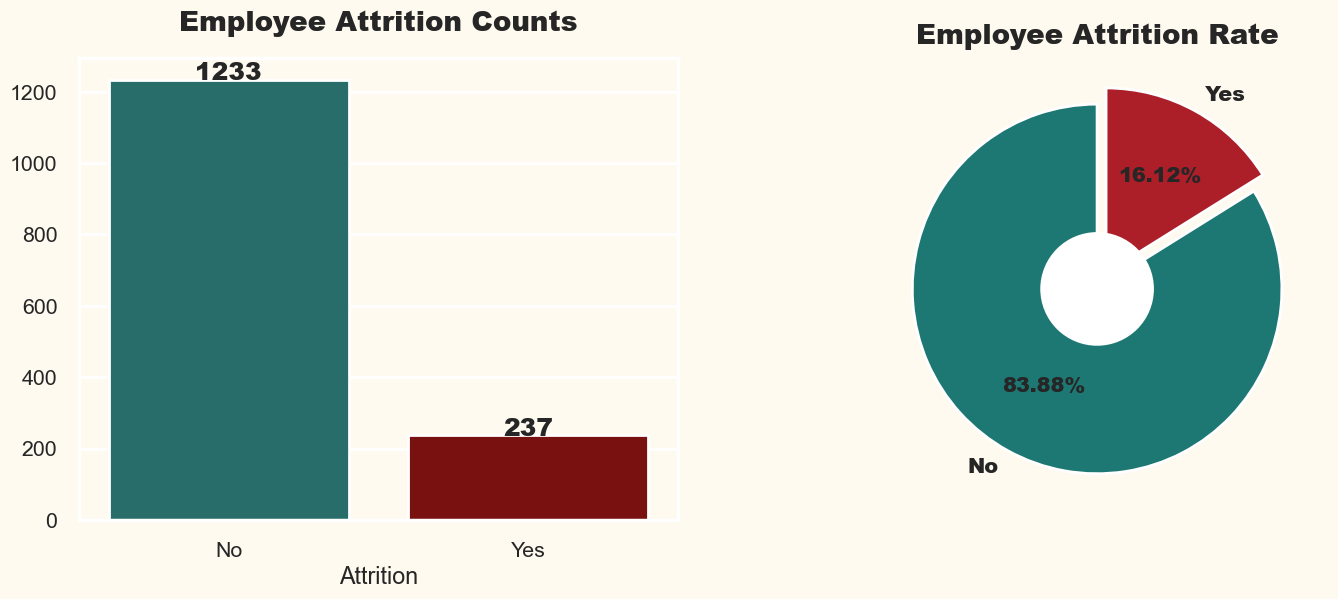

In [10]:
# 檢視員工離職數量和比例，觀察目前情況是否在合理範圍內

# 使用柱狀圖呈現員工離職的計數
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

# 利用圓餅圖呈現員工離職的百分比
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

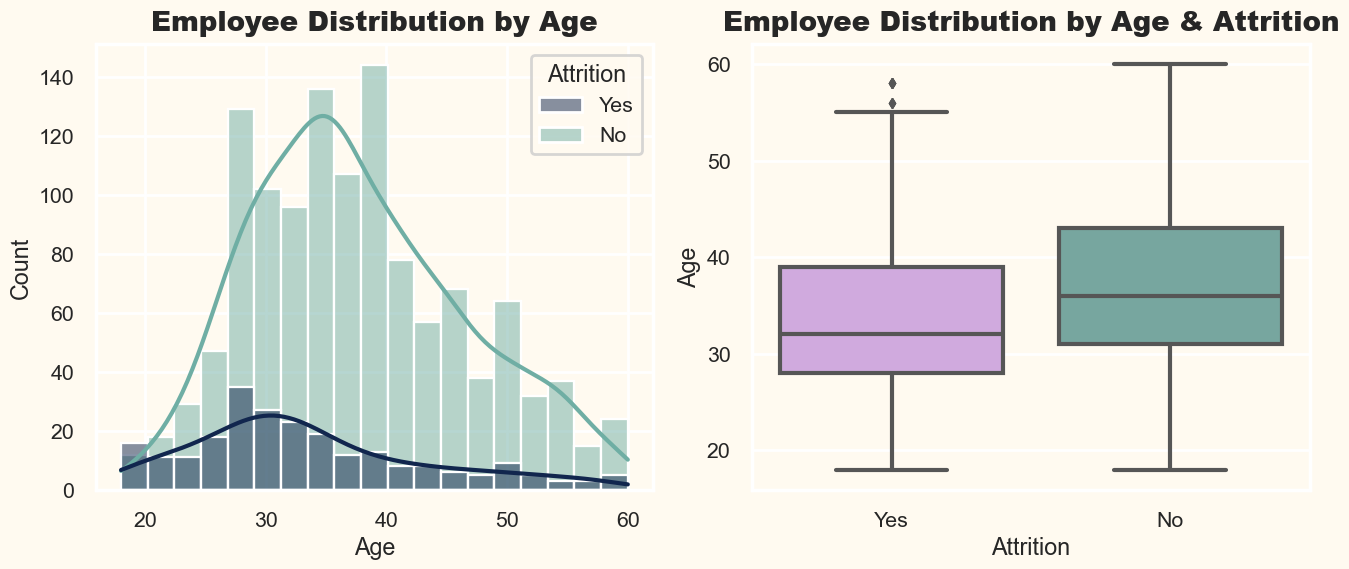

In [11]:
# 檢視離職率和年紀的關係
# 使用柱狀圖搭配線條呈現不同年齡的離職情況
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)


# 使用盒鬚圖呈現不同年齡的離職情況
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

# 觀察發現
    #1.大部分員工的年齡介於 30 到 40 歲之間.
    #2.可以觀察到隨著年齡的增長，離職率逐漸下降。
    #3.從盒鬚圖可以發現，離職員工年齡的中位數低於仍在職的員工年齡中位數
    #4.年齡較低的員工離職的比例高於年齡較高的員工


In [12]:
# 其他發現 : 

# EnvironmentSatisfaction（環境滿意度）、JobSatisfaction（工作滿意度）、PerformanceRating（績效評分）和 RelationshipSatisfaction（關係滿意度）對員工流失的影響不大。

# JobLevel（職位階級）較低、MonthlyIncome（月收入）較低、YearAtCompany（在公司的年限較短）以及 TotalWorkingYears（總工作年數較短）的員工更有可能辭職。

# BusinessTravel（商務出差）：經常出差的員工比其他員工更有可能辭職。
# Department（部門）：在研發部門工作的員工比其他部門的員工更有可能留下來。
# EducationField（教育領域）：擁有人力資源和技術學位的員工比其他領域的員工更有可能辭職。
# Gender（性別）：男性員工更有可能辭職。
# JobRole（工作角色）：實驗室技術員、銷售代表和在人力資源部門工作的員工比其他職位的員工更有可能辭職。
# MaritalStatus（婚姻狀況）：單身的員工比已婚和離婚的員工更有可能辭職。
# OverTime（加班）：加班時間較長的員工比其他員工更有可能辭職。

# ANOVA 分析

In [1]:
# 運用 ANOVA 來分析員工離職的數值特徵之間的差異性
num_cols = df.select_dtypes(np.number).columns

NameError: name 'df' is not defined

In [14]:
new_df = df.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [15]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

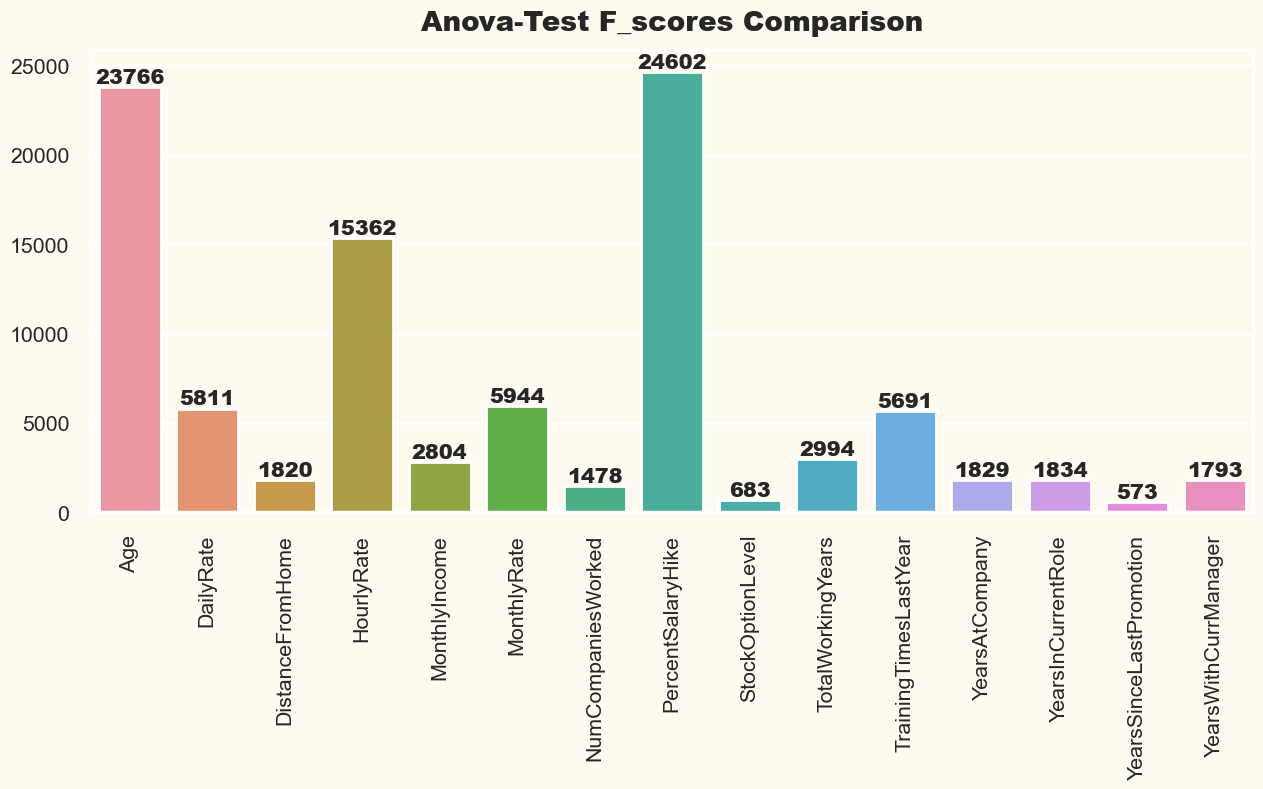

In [16]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

In [17]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.30f') for p in list(p_values.values())]

In [18]:
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.000000000000000000000000000000
1,DailyRate,5811.796569,0.000000000000000000000000000000
2,DistanceFromHome,1820.614585,0.000000000000000000000000000000
3,HourlyRate,15362.122371,0.000000000000000000000000000000
4,MonthlyIncome,2804.459632,0.000000000000000000000000000000
5,MonthlyRate,5944.089071,0.000000000000000000000000000000
6,NumCompaniesWorked,1478.188633,0.000000000000000000000000000000
7,PercentSalaryHike,24602.507947,0.000000000000000000000000000000
8,StockOptionLevel,683.069576,0.000000000000000000000000000000
9,TotalWorkingYears,2994.906310,0.000000000000000000000000000000


# 卡方檢定

In [19]:
# 運用卡方檢定來分析員工離職的類別特徵的重要性
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [20]:
chi2_statistic = {}
p_values = {}

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

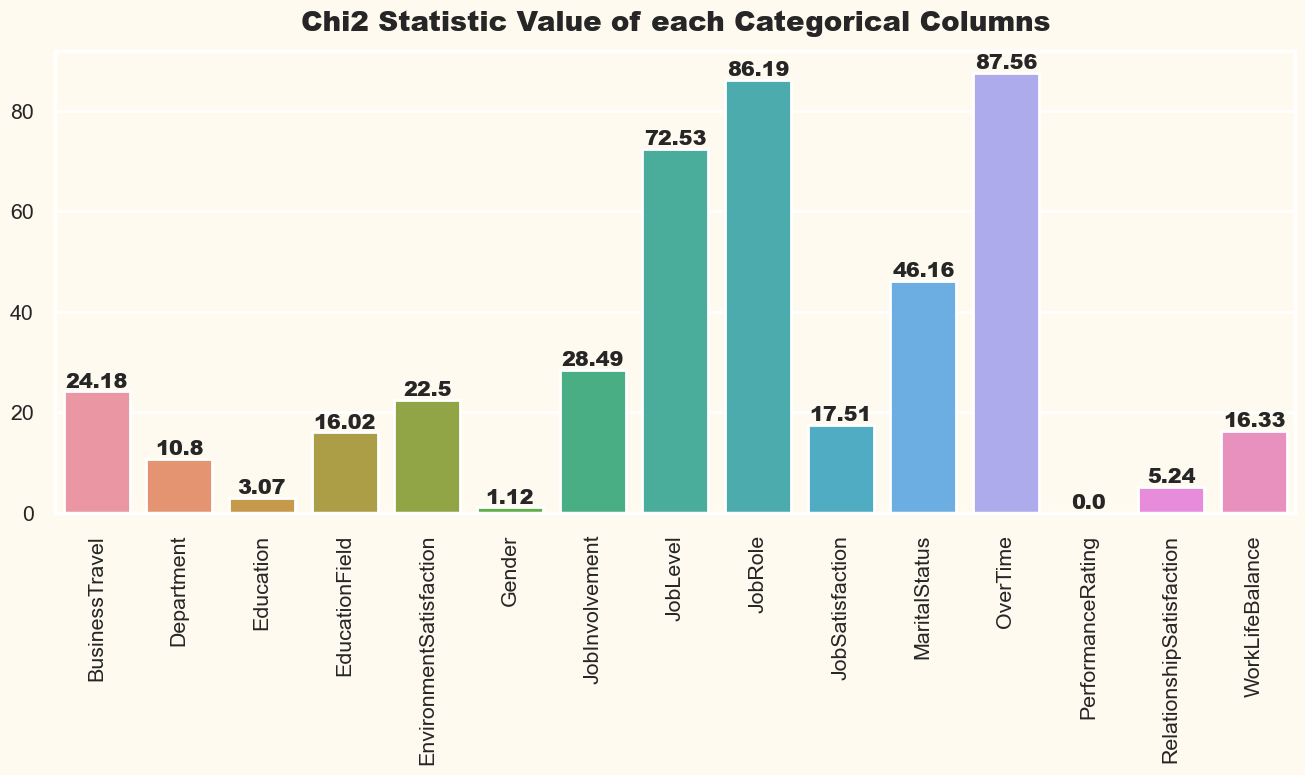

In [21]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

In [22]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [23]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


In [24]:
# 卡方檢定結論

# 以下特徵顯示與員工離職有統計顯著關聯：
    # 1. Department
    # 2. EducationField
    # 3. EnvironmentSatisfaction
    # 4. JobInvolvement
    # 5. JobLevel
    # 6. JobRole
    # 7. JobSatisfaction
    # 8. MaritalStatus
    # 9. OverTime
    # 10. WorkLifeBalance

# 以下特徵並未顯示與離職有統計上的顯著關聯 :
    # 1. Gender
    # 2. Education
    # 3. PerformanceRating
    # 4. RelationshipSatisfaction

# 分析結論

In [25]:
# 多個變數顯示與員工流失有顯著相關，顯示它們在預測流失風險中的重要性。
    # 數值變數包括下列的因素：
        # 年齡
        # 薪資（例如 MonthlyIncome 和 PercentSalaryHike）。
        # 工作經驗（例如 TotalWorkingYears 和 YearsAtCompany）。
        # 其他（例如 JobRole 和 YearsInCurrentRole）。
    # 類別變數包括下列的因素：
        # 與職位相關（例如 Department、EducationField、JobRole、MaritalStatus）。
        # 與工作相關（例如 EnvironmentSatisfaction、JobInvolvement、JobSatisfaction、OverTime 和 WorkLifeBalance）。